In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
images = cv2.imread('images/coin.png',0)

In [3]:
kernel = np.array([[-1,0,1],
                  [-1,0,1],
                  [-1,0,1]])

In [4]:
filtered = cv2.filter2D(images, -1, kernel)  # -1 is the depth of image

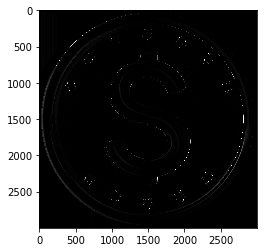

In [5]:
plt.imshow(filtered, cmap = "gray")

In [6]:
kernel2 = np.array([[0,0,0],
                   [0,1,0],
                   [0,0,0]])

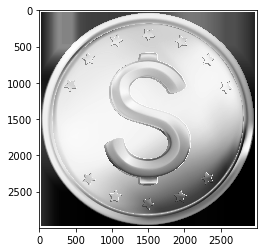

In [7]:
filtered2 = cv2.filter2D(images, -1, kernel2)
plt.imshow(filtered2, cmap = "gray")

In [8]:
kernel3 = np.ones((3,3))/9  #this is called averaging, it averages the pixel intensity and gives balanced image
print(kernel3)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


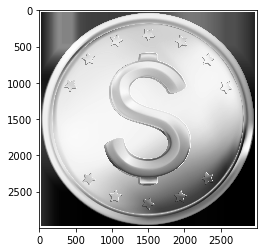

In [9]:
filtered3 = cv2.filter2D(images, -1, kernel3)
plt.imshow(filtered3, cmap = "gray")

In [10]:
# sobel x
kernel1 = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

flag = cv2.imread('images/flag.jpg',0)

In [11]:
filtered1=cv2.filter2D(flag, -1, kernel1) # this gives vertical lines

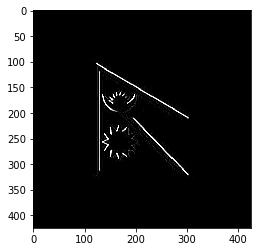

In [12]:
plt.imshow(filtered1, cmap="gray")

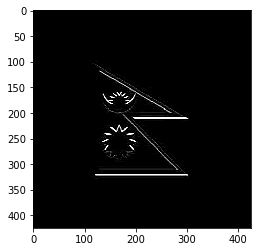

In [13]:
filtered4 = cv2.filter2D(flag, -1, kernel1.T) # this gives horizontal lines or edges
plt.imshow(filtered4, cmap="gray")

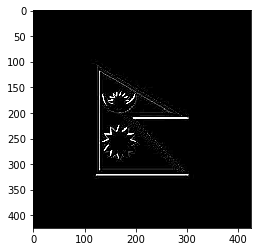

In [14]:
#to show both vertical and horizontal edges we sum both kernels:

kernel4 = kernel1+kernel1.T
filtered5 = cv2.filter2D(flag, -1, kernel4)
plt.imshow(filtered5, cmap="gray")

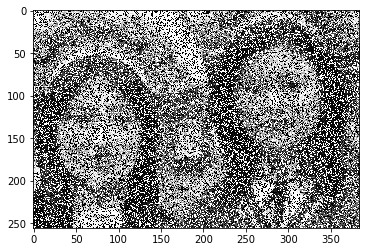

In [15]:
noise = cv2.imread("images/noise.png", 0)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(noise, cmap = "gray")


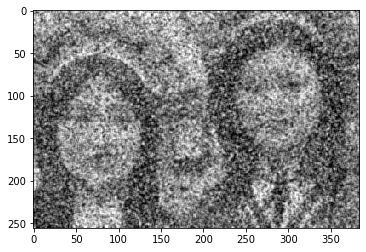

In [16]:
kernel6 = np.ones((3,3))/9

filtered6 = cv2.filter2D(noise, -1, kernel6)
plt.imshow(filtered6, cmap="gray")

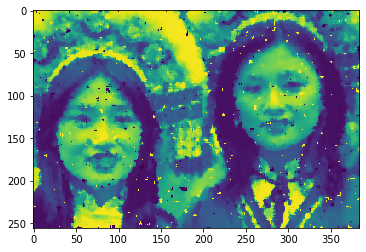

In [17]:
filtered7 = cv2.medianBlur(noise, 5) # 5 denotes the box size, it can only be odd to find median value 
plt.imshow(filtered7)

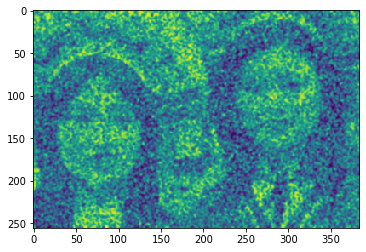

In [18]:
filtered8 = cv2.GaussianBlur(noise, (5,5), -1)
plt.imshow(filtered8)

In [19]:
retval, thresh = cv2.threshold(noise, 100,200,0) # threshholding ..retval returns boolean value true or false


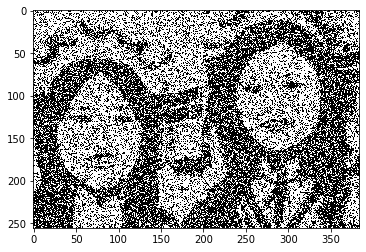

In [20]:
plt.imshow(thresh, cmap= "gray")

In [21]:
_, thresh = cv2.threshold(flag, 100, 200, cv2.THRESH_BINARY) # _ holds binary value

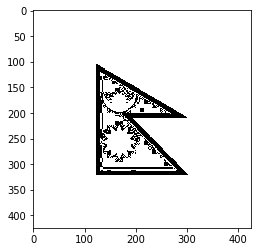

In [22]:
plt.imshow(thresh, cmap = "gray")

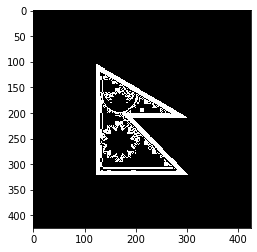

In [23]:
_, thresh = cv2.threshold(flag, 100, 200, cv2.THRESH_BINARY_INV) # inverse binary thresholding
plt.imshow(thresh, cmap = "gray")

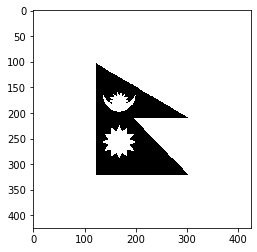

In [24]:
ots, thresh = cv2.threshold(flag, 100, 200, cv2.THRESH_OTSU)
plt.imshow(thresh, cmap = "gray")

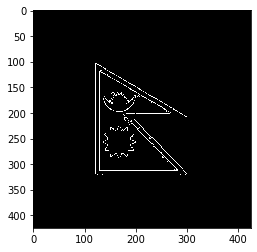

In [25]:
low = 10
high = 200
canny_img = cv2.Canny(flag, low, high)
plt.imshow(canny_img, cmap= "gray")

In [26]:
# CANNY EDGE DETECTOR IS BETTER AMONG ALL

In [27]:
# LINE DETECTION USING HOUGH TRANSFORM
img = cv2.imread('images/durbar.jpg', 0)

canny_img = cv2.Canny(img, low, high)

In [28]:
# Hough Transform:

rho = 1
theta = np.pi / 180
threshold = 60
max_line_length = 50
max_line_gap = 50

lines = cv2.HoughLinesP(canny_img, rho, theta, threshold, np.array([]), max_line_length, max_line_gap)


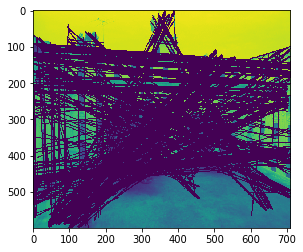

In [29]:
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2) # 2 represents no of pixels to show
plt.imshow(img)

In [30]:
# Face Detection using OpenCV

img = cv2.imread("images/xmen.jpg", 1) 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# directory for haar cascade that we are using for detection

cascade_dir = "C:/ajingar/Lib/site-packages/cv2/data/"  #remember the / at last

face_cascade = cv2.CascadeClassifier(cascade_dir + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cascade_dir + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 5)

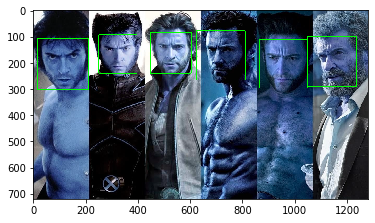

In [31]:
for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(img)

In [32]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)

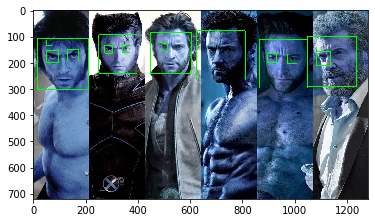

In [33]:
for (x, y, w, h) in eyes:
    img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
plt.imshow(img)

In [ ]:
pwd